In [16]:
import numpy as np 
from draine_dust import draine_dust
import astropy.units as u
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [6]:
type = 'SMC'
dust_obj = draine_dust(5000.*u.AA, type='SMC')
if type=='SMC':
    p_fname = "draine_models/callscat_init_p.out_SMC_bar"
    s_fname = "draine_models/callscat_init_i.out_SMC_bar"
elif type=='LMC':
    p_fname = "draine_models/callscat_init_p.out_LMC_avg"
    s_fname = "draine_models/callscat_init_i.out_LMC_avg"
elif type=='MW':
    p_fname = "draine_models/callscat_init_p.out_MW_3.1"
    s_fname = "draine_models/callscat_init_i.out_MW_3.1"
else:
    print("Unknown dust type")

In [7]:
wave_pfrac, theta_S_pfrac, pfrac = dust_obj.read_file(p_fname)

In [19]:
wave_pfrac

array([ 0.06  ,  0.07  ,  0.08  ,  0.09  ,  0.1   ,  0.11  ,  0.12  ,
        0.13  ,  0.14  ,  0.15  ,  0.16  ,  0.17  ,  0.182 ,  0.222 ,
        0.2696,  0.3354,  0.355 ,  0.4685,  0.547 ,  0.6165,  0.6492,
        0.748 ,  0.802 ,  0.893 , 10.2   ,  9.    ,  8.    ,  5.8   ,
        4.75  ,  3.8   ,  3.45  ,  2.19  ,  1.63  ,  1.22  ,  1.    ,
        0.9   ])

In [11]:
def pfrac_wave(theta):
    k = np.argmin(np.abs(theta.to(u.deg).value-theta_S_pfrac))
    return interp1d(wave_pfrac, pfrac[k,:])

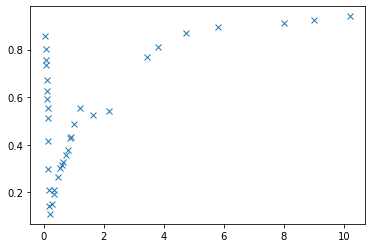

In [18]:
pfrac_interp = pfrac_wave(90.*u.deg)
plt.plot(wave_pfrac, pfrac_interp(wave_pfrac), 'x')

array([0.8552, 0.8018, 0.7542, 0.7357, 0.6719, 0.6244, 0.5908, 0.5556,
       0.5116, 0.4178, 0.2988, 0.2116, 0.1417, 0.1095, 0.1497, 0.2095,
       0.1951, 0.2665, 0.3014, 0.3168, 0.3273, 0.3577, 0.3801, 0.4278,
       0.94  , 0.9245, 0.9122, 0.8935, 0.8715, 0.8114, 0.7701, 0.5423,
       0.5235, 0.5525, 0.487 , 0.4313])